In [4]:
!pip3 install urllib2

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement urllib2 (from versions: none)
ERROR: No matching distribution found for urllib2


In [1]:
print("Hello")

Hello


In [2]:
import urllib.request as urllib2
import json
import csv

mydata = []
for i in range (1,13):
    for j in range(1,32):
        if(i>=10):
            url = "https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?date=2021"+str(i)+str(j)+"&json"
        else:
            url = "https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?date=20210"+str(i)+str(j)+"&json"
        d = urllib2.urlopen(url).read()
        mydata.append(json.loads(d))

alldata = []
for data in mydata:
    for i in data:
        alldata.append(i)

KeyboardInterrupt: 

In [4]:
print(len(mydata))
print(mydata[0][0])

372
{'r030': 36, 'txt': 'Австралійський долар', 'rate': 21.6852, 'cc': 'AUD', 'exchangedate': '01.01.2021'}


In [5]:
def data_csv(data,name):
    count = 0
    fname = name
    with open(fname,'w') as outf:
        outcsv = csv.writer(outf)
        for d in data:
            if count == 0:
                header = d.keys()
                outcsv.writerow(header)
                count += 1
            outcsv.writerow(d.values())
data_csv(alldata,'exchange_money.csv')

In [12]:
!sudo pip3 install boto3

     |████████████████████████████████| 132 kB 38.5 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 8.8 MB 59.5 MB/s eta 0:00:01
     |████████████████████████████████| 138 kB 68.9 MB/s eta 0:00:01


In [7]:
import logging
import boto3
from botocore.exceptions import ClientError
import os

def upload_file(file_name, bucket, object_name=None):

    # If S3 object_name was not specified, use file_name
    if object_name is None:
        object_name = os.path.basename(file_name)

    # Upload the file
    s3_client = boto3.client('s3')
    try:
        response = s3_client.upload_file(file_name, bucket, object_name)
    except ClientError as e:
        logging.error(e)
        return False
    return True

In [5]:
import boto3
s3 = boto3.client('s3')

In [14]:

with open("exchange_money.csv", "rb") as f:
    s3.upload_fileobj(f, "ivannbucket", "exchange_money1.csv",)


In [7]:
with open('exchange_money1.csv', 'wb') as f:
    s3.download_fileobj('ivannbucket', "exchange_money1.csv", f)

In [8]:
import pandas as pd
df = pd.read_csv('exchange_money1.csv')
df.head()


,r030,txt,rate,cc,exchangedate
0,36,Австралійський долар,21.6852,AUD,01.01.2021
1,124,Канадський долар,22.1154,CAD,01.01.2021
2,156,Юань Женьміньбі,4.3333,CNY,01.01.2021
3,191,Куна,4.6037,HRK,01.01.2021
4,203,Чеська крона,1.3238,CZK,01.01.2021


In [9]:
df['exchangedate'] =  pd.to_datetime(df.exchangedate)
EUR = df.where(df['cc']=='EUR').sort_values(by = 'exchangedate').dropna()
USD = df.where(df['cc']=='USD').sort_values(by = 'exchangedate').dropna()
EUR[['exchangedate','rate']].where(EUR['exchangedate'].dt.day==28).dropna()

,exchangedate,rate
1680,2021-01-28,34.1207
3571,2021-02-28,34.1459
5282,2021-03-28,33.0337
7145,2021-04-28,33.5577
8946,2021-05-28,33.5693
10806,2021-06-28,32.7928
12607,2021-07-28,31.7814
14467,2021-08-28,31.6645
16327,2021-09-28,31.1764
18128,2021-10-28,30.6447


In [18]:
USD.head()

,r030,txt,rate,cc,exchangedate
26,840,Долар США,28.2746,USD,2021-01-01
1917,840,Долар США,28.1324,USD,2021-01-02
3628,840,Долар США,27.9456,USD,2021-01-03
5519,840,Долар США,27.8226,USD,2021-01-04
7320,840,Долар США,27.7500,USD,2021-01-05


In [19]:
EUR.head()

,r030,txt,rate,cc,exchangedate
33,978,Євро,34.7396,EUR,2021-01-01
1924,978,Євро,34.1570,EUR,2021-01-02
3635,978,Євро,33.8449,EUR,2021-01-03
5525,978,Євро,32.6290,EUR,2021-01-04
7326,978,Євро,33.6427,EUR,2021-01-05


In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

<Figure size 432x288 with 0 Axes>

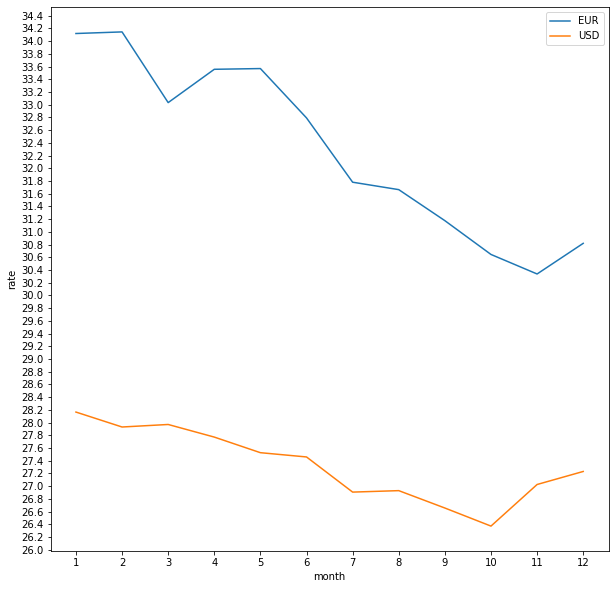

In [11]:
fig = plt.figure()

fig, ax = plt.subplots()

ax.plot(EUR['exchangedate'].where(EUR['exchangedate'].dt.day==28).dropna().dt.month, EUR['rate'].where(EUR['exchangedate'].dt.day==28).dropna(), label = 'EUR') 
ax.plot(USD['exchangedate'].where(USD['exchangedate'].dt.day==28).dropna().dt.month,USD['rate'].where(USD['exchangedate'].dt.day==28).dropna(),label = 'USD') 
fig.set_figheight(10) 
fig.set_figwidth(10) 
ax.set_xlabel('month') 
ax.set_ylabel('rate') 
ax.legend() 
loc = plticker.MultipleLocator(base=1.0) 
ax.xaxis.set_major_locator(loc) 
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=0.2)) 
plt.savefig('months.png')
plt.show()

<Figure size 432x288 with 0 Axes>

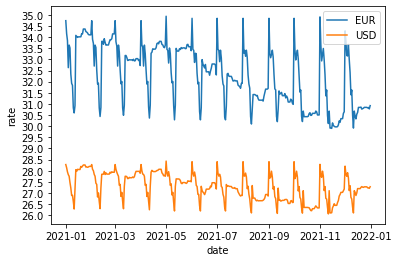

In [14]:
fig = plt.figure()

fig, ax = plt.subplots()

ax.plot(EUR['exchangedate'],  EUR['rate'], label = 'EUR')
ax.plot(USD['exchangedate'],USD['rate'],label = 'USD')

ax.set_xlabel('date')
ax.set_ylabel('rate')
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=0.5)) 
ax.legend()
plt.savefig("year.png")

In [15]:
s3 = boto3.client('s3')
with open("months.png", "rb") as f:
    s3.upload_fileobj(f, "ivannbucket", "months.png")
with open("year.png", "rb") as f:
    s3.upload_fileobj(f, "ivannbucket", "year.png")